# Estimate a spectral density function

The objective of this example is to estimate the spectral density
function $S$ from data, which can be a sample of time series or one time
series.

The following example illustrates the case where the available data is a
sample of $10^3$ realizations of the process, defined on the time grid
$[0, 102.3]$, discretized every $\Delta t = 0.1$. The spectral model of
the process is the Cauchy model parameterized by $\underline{\lambda}=(5)$
and $\underline{a}=(3)$.

The figure draws the graph of the real spectral
model and its estimation from the sample of time series.


In [1]:
from __future__ import print_function
import openturns as ot

In [2]:
# generate some data

# Create the time grid
# In the context of the spectral estimate or Fourier transform use,
# we use data blocs with size of form 2^p
tMin = 0.
tstep = 0.1
size = 2**12
tgrid = ot.RegularGrid(tMin, tstep, size)

# We fix the parameter of the Cauchy model
amplitude = [5.0]
scale = [3.0]
model = ot.CauchyModel(amplitude, scale)
process = ot.SpectralGaussianProcess(model, tgrid)

# Get a time series or a sample of time series
tseries = process.getRealization()
sample = process.getSample(1000)

In [3]:
# Build a spectral model factory
segmentNumber = 10
overlapSize = 0.3
factory = ot.WelchFactory(ot.Hanning(), segmentNumber, overlapSize)

In [4]:
# Estimation on a TimeSeries or on a ProcessSample
estimatedModel_TS = factory.build(tseries)
estimatedModel_PS = factory.build(sample)

In [5]:
# Change the filtering window
factory.setFilteringWindows(ot.Hamming())

In [6]:
# Get the frequencyGrid
frequencyGrid = ot.SpectralGaussianProcess(estimatedModel_PS, tgrid).getFrequencyGrid()

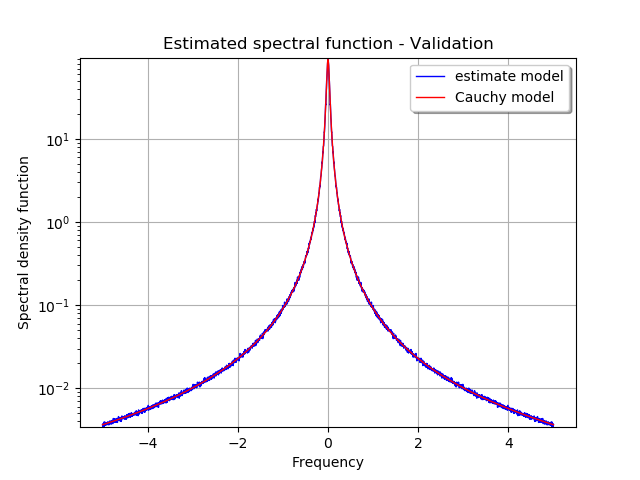

In [7]:

# With the model, we want to compare values
# We compare values computed with theoritical values
plotSample = ot.Sample(frequencyGrid.getN(), 3)

# Loop of comparison ==> data are saved in plotSample
for k in range(frequencyGrid.getN()):
    freq = frequencyGrid.getStart() + k * frequencyGrid.getStep()
    plotSample[k, 0] = freq
    plotSample[k, 1] = abs(estimatedModel_PS(freq)[0, 0])
    plotSample[k, 2] = abs(model(freq)[0, 0])

# Some cosmetics : labels, legend position, ...
graph = ot.Graph("Estimated spectral function - Validation", "Frequency",
              "Spectral density function", True, "topright", 1.0, ot.GraphImplementation.LOGY)

# The first curve is the estimate density as function of frequency
curve1 = ot.Curve(plotSample.getMarginal([0, 1]))
curve1.setColor('blue')
curve1.setLegend('estimate model')

# The second curve is the theoritical density as function of frequency
curve2 = ot.Curve(plotSample.getMarginal([0, 2]))
curve2.setColor('red')
curve2.setLegend('Cauchy model')

graph.add(curve1)
graph.add(curve2)
graph